<h1>Null Hypothesis and T-testing</h1>

<strong>Our null hypothesis ( 𝐻0 ) is that the actual mean return from the signal is zero.</strong> We'll perform a one-sample, one-sided t-test on the observed mean return, to see if we can reject  𝐻0 .

We'll need to first compute the t-statistic, and then find its corresponding p-value. The p-value will indicate the probability of observing a t-statistic equally or more extreme than the one we observed if the null hypothesis were true. <strong>A small p-value </strong>casts that the chance of observing the t-statistic we observed under the null hypothesis is small, and thus <strong>casts doubt on the null hypothesis. </strong>It's good practice to set a desired level of significance or alpha ( 𝛼 ) before computing the p-value, and then reject the null hypothesis if  𝑝<𝛼 .

For this project, we'll use  𝛼=0.05 , since it's a common value to use.

<h1>Quant Workflow</h1>

<h3>Hypothesis</h3>
<li>Hypothesis - A theory about how to profit from trading. Foundation for any trading strategy</li>
<li>based on how the markets might work, starting point to test a strategy</li>
<li>The precise manner in which and how a hypothesis is wrong will show where to improve it</li>
<li>next step is to determine an alpha, what to invest at what signal</li>
<li>Research and testing stages - test a hypothesis on historical data is called <strong>backtesting</strong></li>

<h3>Flavors of trading</h3>
<li>single asset trading</li>
<li>pairwise trading - if one stock appreciates more than the other, the other might catch up </li>
<li>cross sectional strategies - benefit from transient market phenomenon, usually based on fundamental signals</li>
<li>alternative data based strategies (social media, satellite, ...)</li>
<li>contrarian strategy - if prices arent justified by fundamental object the move trade against it</li>

<h3>Anatomy of a Strategy</h3>

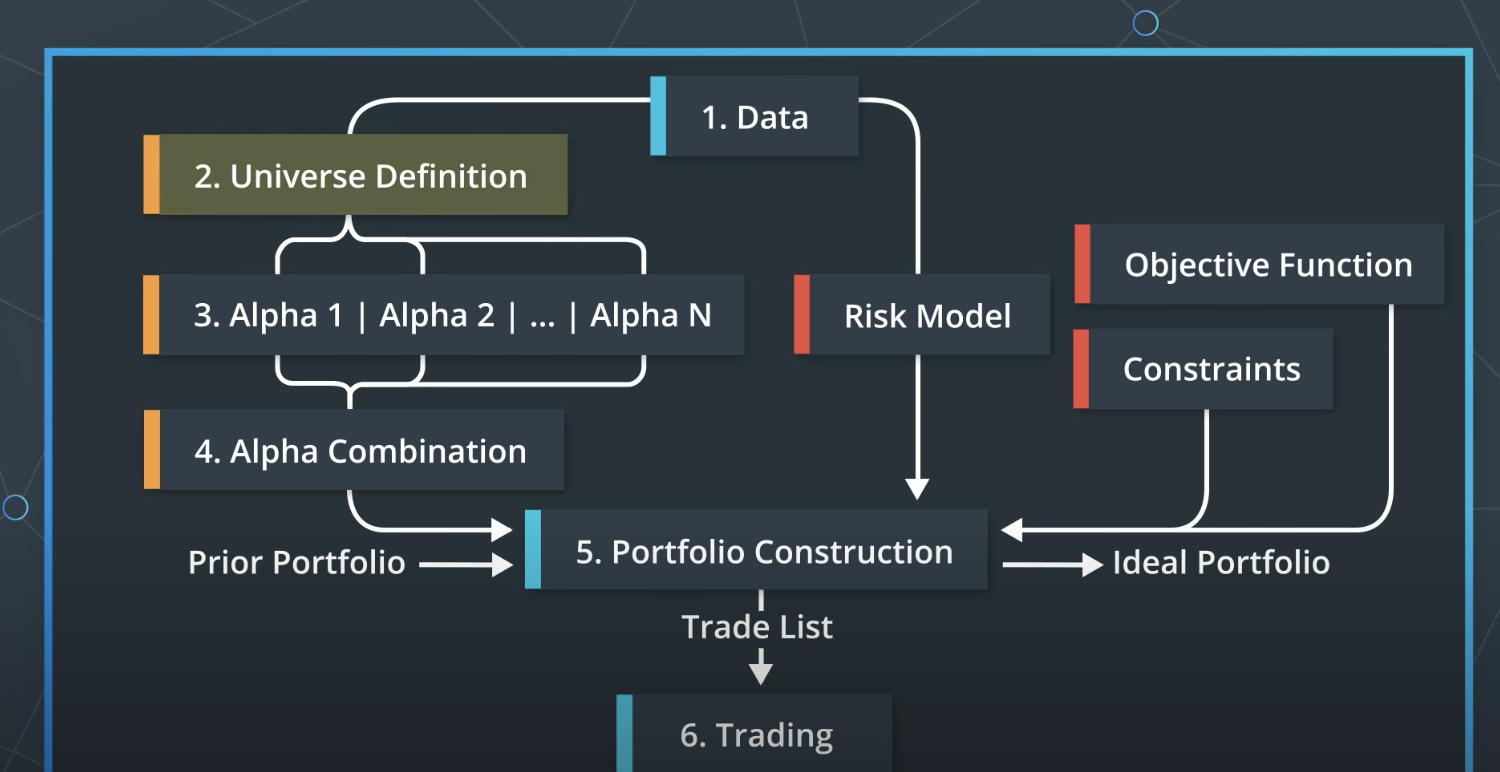

Alpha discovery stage - research
<li>Alpha (different context) - a trading signal </li>
<li>an expression applied to the cross section of stocks. It outputs a vector where each component is a value indicating future returns for a stock</li>
<li>Alpha Vector - ranking of value, can be used to decide what to put into long and short portfolio</li>
<li>Logic that produces the ranks - Alpha</li>
<li>rare that just one alpha provides sufficiently good signals</li>
<li>combine alphas - model stacking</li>

<li>an alpha based on momentum (volume,stock price) might combine with an alpha based on fundamentals (debt, cash flow, supply and demand for products)</li>
<li>combined alpha can be computed by adding up ranks</li>
<li>For machine learning alphas can be converted into features</li>

Risks
<li>systematic risk - inherent to a market or sector</li>
<li>stock specific risk - idisyncratic risk</li>

<h1>Outliers</h1>

trading signals are ideally robust to outliers, ideally rolling mean also can help that but with a delay. Or comparison between peers of stocks. Machine learning can also help to predict. Bayesian learning...

<br>

<li>caused by corporate actions, such as dividends, special dividends, stock outages</li>
<li>thinly traded stocks cause fluctuations. they are real but unpredictable</li>
<li>before and after crashes stocks are volatile. happens rarely so should be excluded from signals</li>
<li>due to outlier events signals will perform poorly but likewise they would perfor poorly on average days</li>
<li>raw data outliers: missing values, find them with rule based filters</li>
<li>if price changes are accompanied by volume, they are less likely to be wrong</li>
<li>backtesting should consider missing data</li>
<li>single product drug companies are usually excluded from predictions since drug approvals are hard to predict</li>

<h1>Regression</h1>

Statistical Arbitrage
<li>trading technique about buying and selling two dependend assets</li>
<li>signal predicts dependent variable</li>
<li>signal to noise ratio is usually low in finance</li>
<li>models will have to be retrained over time, dependet variables to predict signals might become invalid, will fade</li>
<li>model validation assumes standard distributions</li>
<hr>
<li>a histogram resembles the shape of its probability distribution</li>

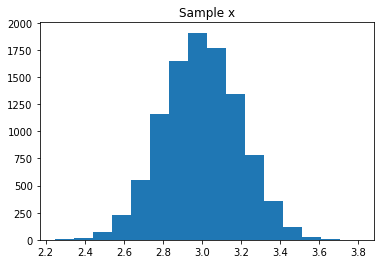

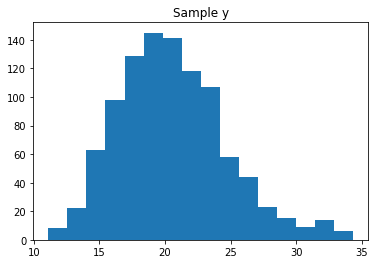

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(19680801)
mu, sigma = 3, 0.2
#mu is mean, standard deviation is sigma
x = mu + sigma * np.random.randn(10000)
y = np.random.lognormal(mu,sigma,1000)

def plot_histogram(sample, title, bins=16, **kwargs):
    plt.hist(sample,bins)
    plt.title(title)
    return plt.show()

def test_run():
    #D = pd.read_csv("D.csv", header=None, squeeze=True)
    plot_histogram(x, title="Sample x")
    plot_histogram(y, title="Sample y")

if __name__ == '__main__':
    test_run()


Probability Density Function (PDF)
Probability of X given D P(x D)
Standard normal distribution has a mean of 0 and a std. dev of 1.
different distributions can be modeled with the same formuly by adjusting mu (mean) and sigma (standard distribution)
 μ = 0,  σ = 1

Boxplots can be used to check distributions for normality, for symmetry
quartiles are the three dividing lines that create four data sections (quartiles), line inside is median, half of data points. 75% of data will be before third quartile.
lines are whiskers, beyond whiskers : outliers

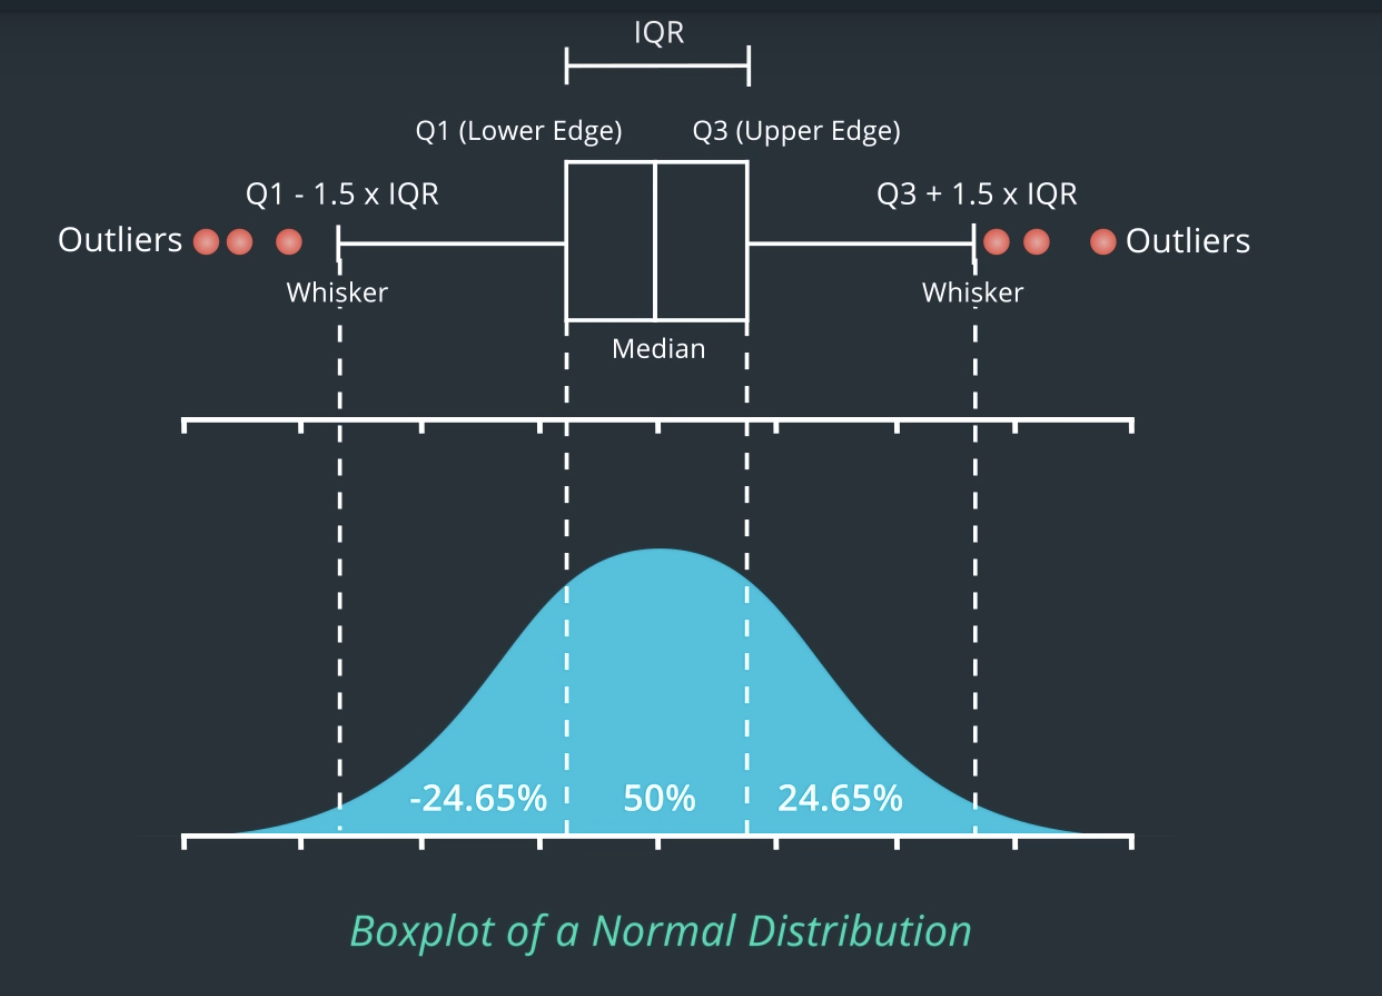

mean left of median = left skewed distribution, usually with stock returns
QQ Plot = check if shape of data matches probability density functions

There are three hypothesis tests that can be used to decide if a data distribution is normal. These are the Shapiro-Wilk test and D’Agostino-Pearson, and the Kolmogorov-Smirnov test. Each of these produce p-value, and if the p-value is small enough, say 0.05 or less, we can say with a 95% confidence that the data is not normally distributed. Shapiro-Wilk tends to perform better in a broader set of cases compared to the D’Agostino-Pearson test.

p value > 0.05 = normal distribution

performance tests will assume data is normally distributed, therefore the performance tests will fail if data wasnt normally distributed

Variance of data needs to be stable over time = Homoscedasisity, not stable = heterosc...
test used = breusch pagan test, if p > 0.05 then data is homoscedastic.

<h3>Normalize data</h3>

Making data homoscedastic / transforming it: 
feed it through the log function
box cox transformation

monotonic transformation keeps sequence but makes distance normal, box-cox uses lambda value for tweaking, if lambda = 0 then its just the natural log applied

<h3>Regression</h3>
<li>y depends on x -> y = ßx + a</li>
<li>ß coefficient (slope), a intercept, x = area of house</li>
<li>vertical distance between line and data is the error, ordinary least squares finds best fit regression line and each point</li>
<li>error terms, residuals is the distance between line and data points</li>
<li>if all residuals on the line follow a std. distribution then errors can be considered random, otherwise model has a bias</li>
<li>model can be improved by using more independent variables (multiple regression)</li>
<li>R-squared for testing : 1 - all variation can be explained, adjusted r-squared, f-test (coefficient and intercepts are non zero!? if yes then meaningful</li>

<br>
<li>predicting more than one y at a time (dependent variable) its called multivariate regression, more dependent ones also = multivariate multipe regression</li>

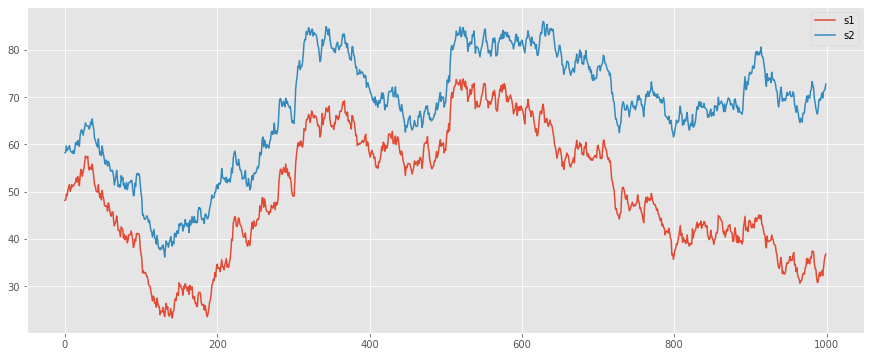

In [34]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

# just set the seed for the random number generator
np.random.seed(100)
# use returns to create a price series
drift = 100
r0 = pd.Series(np.random.normal(0, 1, 1000))
s0 = pd.Series(np.cumsum(r0), name='s0') + drift

noise1 = np.random.normal(0, 0.4, 1000)
drift1 = 50
r1 = r0 + noise1
s1 = pd.Series(np.cumsum(r1), name='s1') + drift1

noise2 = np.random.normal(0, 0.4, 1000)
drift2 = 60
r2 = r0 + noise2
s2 = pd.Series(np.cumsum(r2), name='s2') + drift2

pd.concat([s1, s2], axis=1).plot(figsize=(15,6))
plt.show()

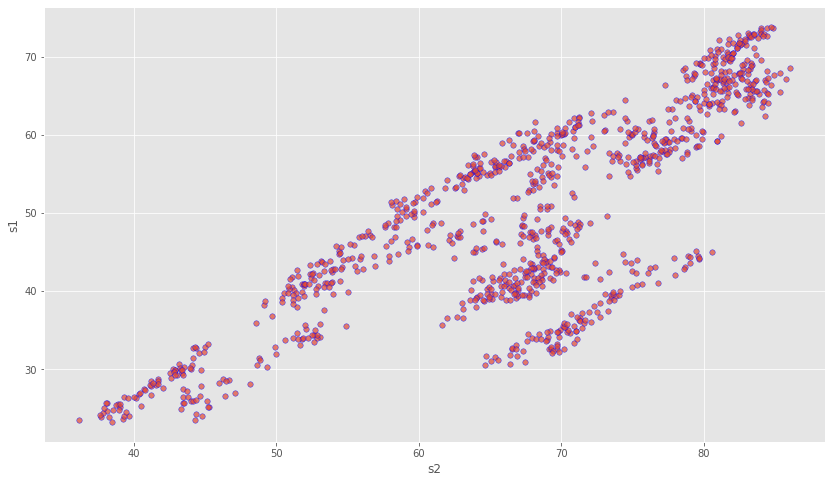

In [35]:
## Plot data with scatterplot
sc = plt.scatter(s2, s1, s=30, edgecolor='b', alpha=0.7)
plt.xlabel('s2')
plt.ylabel('s1');

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
def regression_slope_and_intercept(xSeries, ySeries):
    """
    xSeries: pandas series, x variable
    ySeries: pandas series, y variable
    """
    lr = LinearRegression()
    #TODO: get the values from each series, reshape to be 2 dimensional
    #set s1 to the x variable, s2 to the y variable
    xVar = xSeries.values.reshape(-1,1)
    yVar = ySeries.values.reshape(-1,1)
    
    #TODO: call LinearRegression.fit().  Pass in the x variable then y variable
    lr.fit(xVar,yVar);
    #TODO: obtain the slope and intercept
    slope = lr.coef_[0][0]
    intercept = lr.intercept_[0]
    
    return (slope, intercept)

In [39]:
slope, intercept = regression_slope_and_intercept(s1,s2);
print(f"slope {slope:.2f} and intercept {intercept:.2f}")

slope 0.74 and intercept 30.62


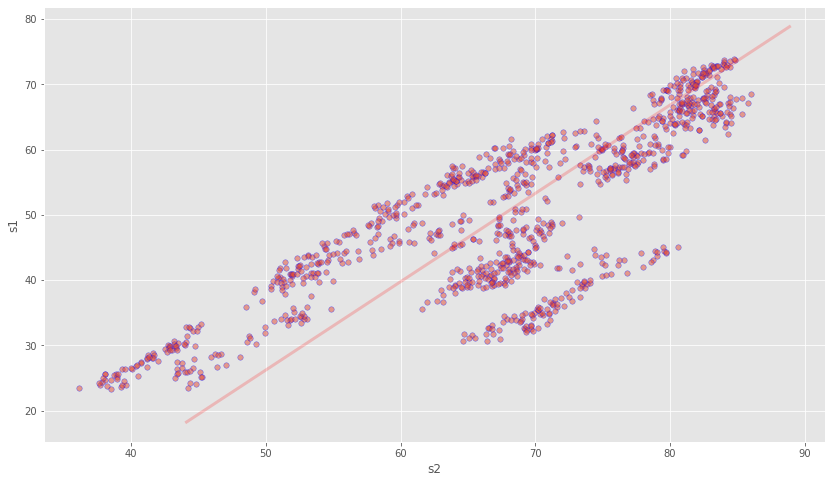

In [40]:
plt.scatter(s2, s1, s=30, edgecolor='b', alpha=0.5);
x = np.linspace(s1.min()-5, s1.max()+5, 2)
yPred = slope * x + intercept
plt.plot(yPred,x, alpha=0.2, lw=3, color='r')
plt.xlabel('s2')
plt.ylabel('s1');

<h1>Time Series Analysis</h1>

Autoregressive (AR) Models: 
<br>
choice of lag will determine how model performs

if prices change, data is non-stationary, mean and std dev change over time
use past values (lag) to predict next future value (p-value)
vector regressive model - relation between two predictions,good for pairs trading
<hr>
Moving Average Model:
portion of noise is called residual
best version of MA-Model checked via autocorrelation model, with high correlation numbers (pos or neg)
<hr>
autoregressive moving average models can be combined (ARMA)
autoregressive integrated moving average model (ARIMA)

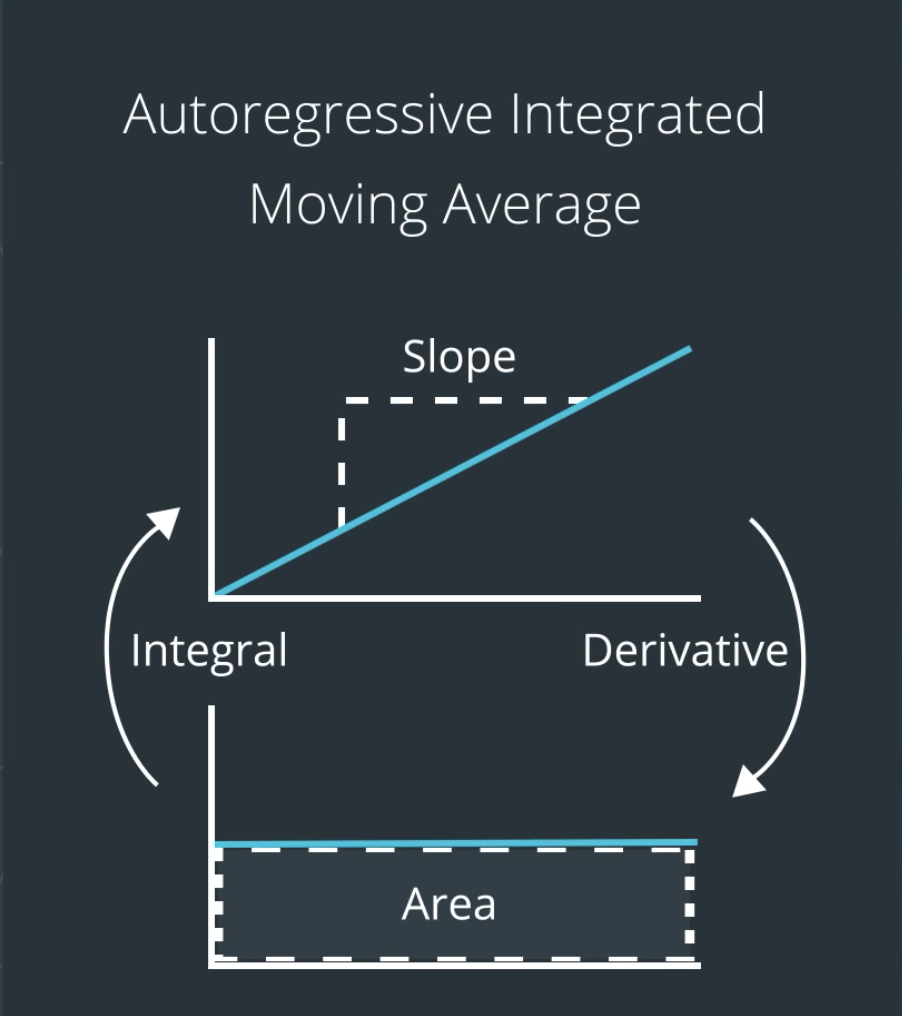



rate of return as a normalized way to interpret data : return = current stock price/previous stock price,
safest in log interpretation (log current / log previous)
<br>
we work with returns not with stock prices because they are more stable
augmented dickey fuller test checks if time series is stationary and stable, if not we need to take the time series like above
<br>
price data is called integrated order 1 since usually not time stable, return data is called integrated order 0 (stationary data)
stationary data is needed for ARIMA/ARMA models (pairs trading relevant)



<h3>Kalman Filter</h3>
<li>Performance of Autoregression determined by lag</li>
<li>Kalman filter captures <strong>state</strong> of past in a single value</li>
<li>we don't have to look back further than t-1</li>
<li>t-1 (belief about hidden state) continuously updated (predict and measurement update steps performed in a loop)</li>
<li>good for noisy data if only indirect measurements are available</li>

<br>
Particle Filter
<li>pay more to accurate helpers every day, less to inaccurate helpers</li>
<li>natural selection, genetic algorithm</li>
<li>more particles that predict the same = more confidence</li>
<li>good for non linear non evenly distributed data</li>
<br>

<br>
Recurrent Neural networks
<li>many regressions stacked in series and in parallel</li>
<li>output from one regression fed as input to another regression</li>
<li>recurrent network cause it takes some of its output to train itself as an input</li>
<li>long short term memory cells (LSTM) helps to remember relevant memory from the past</li>
<br>


<h3>Volatility</h3>
<li>Volatility is the spread of the standard deviation of log returns</li>
<li>measure of risk, helps to design alphas, decide on position sizes, can be traded directly</li>
<li>common approach: extrapolate towards annualized volatility as std measure</li>
<li>sum of all periods log return ln(p/p-1) to be multiplied by square root of 252 (annual) or 12 (months)</li>
<li>typical scale of annual stock volatility is 0.1 to 0.5</li>
<li>A statistical measure of dispersion, such as standard deviation, is commonly used to measure volatility.</li>

In [43]:
def get_most_volatile(prices):
    """Return the ticker symbol for the most volatile stock.
    
    Parameters
    ----------
    prices : pandas.DataFrame
        a pandas.DataFrame object with columns: ['ticker', 'date', 'price']
    Returns
    -------
    ticker : string
        ticker symbol for the most volatile stock
    """
    # TODO: Fill in this function.
    analysis = prices.groupby('ticker')['price'].std()
    ticker = analysis.idxmax()
    return ticker

Rolling Windows are used to measure volatility changes on markets over time
window sizes chosen depends on strategy (long or short)

In [44]:
import numpy as np
import pandas as pd
from datetime import datetime

dates = pd.date_range(datetime.strptime('10/10/2018', '%m/%d/%Y'), periods=11, freq='D')
close_prices = np.arange(len(dates))

close = pd.Series(close_prices, dates)
close

2018-10-10     0
2018-10-11     1
2018-10-12     2
2018-10-13     3
2018-10-14     4
2018-10-15     5
2018-10-16     6
2018-10-17     7
2018-10-18     8
2018-10-19     9
2018-10-20    10
Freq: D, dtype: int64

In [46]:
close.rolling(window = 3)
close.rolling(window = 3).sum()

2018-10-10     NaN
2018-10-11     NaN
2018-10-12     3.0
2018-10-13     6.0
2018-10-14     9.0
2018-10-15    12.0
2018-10-16    15.0
2018-10-17    18.0
2018-10-18    21.0
2018-10-19    24.0
2018-10-20    27.0
Freq: D, dtype: float64

In [47]:
close.rolling(window = 3).min()

2018-10-10    NaN
2018-10-11    NaN
2018-10-12    0.0
2018-10-13    1.0
2018-10-14    2.0
2018-10-15    3.0
2018-10-16    4.0
2018-10-17    5.0
2018-10-18    6.0
2018-10-19    7.0
2018-10-20    8.0
Freq: D, dtype: float64

In [48]:
def calculate_simple_moving_average(rolling_window, close):
    return close.rolling(rolling_window).mean()

<h3>exponential moving average model of volatility</h3>
more recent past with more influence = exponentially weighted moving average
weights decrease exponentially


In [49]:
def estimate_volatility(prices, l):
    #[-1] selects last element
    #something not perfectly right with this formula as test says its wrong
    return prices.ewm(alpha=1-l, adjust=True).mean()[-1]

<li>Volatility is considered sticky (one day follows another) and is easier to predict than price.</li>
<li>autoregresive conditonally heteroscedastic (arch) models are used to forecast volatility</li>
<li>Volatility is not created through news but through volume of trading</li>
<hr>
<li>High volatility times may favor Mean reversion strategies (prices will return to their running mean)</li>
<li>Low volatility times may favor Momentum strategies</li>
<li>Volatility is usually high when markets go down</li>
<li>For strategy selection, low/high Volatility stocks are to be grouped</li>
<li>if a low volatile stock will have an outlier event mean reversion strategy likely kicks in</li>
<li>volatility can determine portfolio position size</li>
<hr>
<li>Breakout strategies based on rolling average plus an upper and lower band (+2std dev of mean) are called bollinger bands. you might want to trade when a band is left and re-entered but this is difficult if stock keeps increasing so for this upper band might be defined through <strong>maximum value within a rolling window</strong></li>

<h3>Mean Reversion and Pairs trading</h3>

<li>stock may revert back to its historical average, but there is a risk they will not return</li>
<li>mean reversion is solidified if a pair of stocks of similar companies is monitored but only one breaks out</li>
<li>DRIFT : long term average, changes very slowly</li>
<li>Volatility term: Randomness (and trade volume)</li>
<hr>
<li>Pairs trading may include going short and long on both pairs at same time, close positions when they converge</li>
<li>prices but not returns are observed</li>
<li>convergence might be observed in weeks or months, depending on stock</li>
<li>trading a pair reduces our exposure to the market</li>
<li>total bucket size of pair (hedge ratio) should not change over time</li>
<li>spread between two pairs of stocks: short or long the spread, buy one asset, short the other."buy low and sell high"</li>
<li>Z-Score used for spread monitoring</li>
<hr>
<li>Cointegration: increase over time similar between two stock series, required for pairs trading. </li>
<li>Integrated dickey fuller test: checks if stocks are stationary over time (cointegrated) so spread is low </li>

<h3>Stocks, Indices and Funds</h3>

Equity = Assets - Liabilities
Stock or Shares represent partial ownership of a company’s equity.
Indices Describe the Market
Indices track subgroups of the market, and may be designed specifically to track stocks in the same stock exchange, same country, or same sector.
Indices give investors a measure of the market’s status.
Professional investment managers may use indices as benchmarks against which they can evaluate their own fund’s performance.

index - virtual portfolio 